<a href="https://colab.research.google.com/github/mferiansyahrt/stock_returns_prediction/blob/main/Stock__Returns_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense,LSTM,Input,GlobalMaxPool1D,GRU,SimpleRNN
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


Open merupakan harga saham pertama kali pada hari yang tertentu dan close merupakan harga saham terakhir pada hari tertentu.

High merupakan harga saham maksimum pada hari tertentu, dan low merupakan harga saham minimum pada hari tertentu.

Volume merupakan jumlah saham yang di-trade pada hari itu.

Notes : Stock prices/Harga saham merupakan timestamp atau dengan kata lain tiap detiknya kita bisa melihat harga saham pada hari tertentu yaitu berapa.

Yang paling penting dari data yaitu apakah seluruh feature berada dalam rentang yang sama. Pada data ini stock prices pada rentang puluhan dan volume berada pada rentang jutaan

In [ ]:
# Cara yang salah dalam melakukan prediksi stock prices
series = df['close'].values.reshape(-1,1)

In [ ]:
# Normalize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

'''Normalisasi dilakukan pada training data saja (Setengah dari total data)
Namun, data yang ditransform yaitu seluruh data (include train & test)
tapi mean dan variance berpatokan pada training data,
hal ini dilakukan karena tidak mau mengikutsertaka test data pada training pipeline
'''

'''
Sebenarnya kita perlu mengkalkulasi boundary (min dan max) pada pembagian data train&test
namun disini kita hanya melakukan .fit hanya pada setengah data (data train),
karena penambahan nilai yaitu dengan cara meng-include data test tidak akan merubah nilai mean&variance terlalu jauh
'''

'\nSebenarnya kita perlu mengkalkulasi boundary (min dan max) pada pembagian data train&test\nnamun disini kita hanya melakukan .fit hanya pada setengah data (data train),\nkarena penambahan nilai yaitu dengan cara meng-include data test tidak akan merubah nilai mean&variance terlalu jauh\n'

In [ ]:
series[:-len(series)//2] # Train Data

array([-1.62500489e+00, -1.64174953e+00, -1.63301320e+00, -1.66431839e+00,
       -1.68470317e+00, -1.77279453e+00, -1.76478623e+00, -1.84778139e+00,
       -1.84486928e+00, -1.78517101e+00, -1.85506167e+00, -1.84996548e+00,
       -1.75604989e+00, -1.73566512e+00, -1.73420906e+00, -1.67378275e+00,
       -1.61481250e+00, -1.57185886e+00, -1.48813567e+00, -1.45755850e+00,
       -1.46192667e+00, -1.48595159e+00, -1.46374674e+00, -1.52963325e+00,
       -1.53108931e+00, -1.58423534e+00, -1.59151561e+00, -1.54783395e+00,
       -1.57549900e+00, -1.55147409e+00, -1.60170800e+00, -1.57549900e+00,
       -1.58569139e+00, -1.58277928e+00, -1.58860350e+00, -1.48740764e+00,
       -1.52817720e+00, -1.49832806e+00, -1.52089692e+00, -1.49760003e+00,
       -1.54929000e+00, -1.52089692e+00, -1.46447477e+00, -1.42698133e+00,
       -1.52744917e+00, -1.46556681e+00, -1.49395989e+00, -1.52672114e+00,
       -1.47685124e+00, -1.45974259e+00, -1.40514050e+00, -1.37310728e+00,
       -1.32432942e+00, -

In [ ]:
series[-len(series)//2:] # Test Data

array([2.46432718, 2.47597562, 2.48034379, 2.5487784 , 2.58517979,
       2.67836735, 2.69147185, 2.65652651, 2.39734862, 1.96490012,
       1.60088622, 1.71009039, 2.12797834, 2.4177334 , 2.37113962,
       2.23718251, 2.06099978, 2.31726556, 2.2342704 , 2.17457212,
       2.30998529, 2.2342704 , 2.33328217, 2.50218462, 2.46723929,
       2.55751473, 2.60847668, 2.61138879, 2.54732234, 2.64924623,
       2.5880919 , 2.68564762, 2.77009885, 2.71476873, 2.3915244 ,
       2.38424412, 2.54732234, 2.6405099 , 2.72787323, 2.86765457,
       2.81669262, 2.82979712, 2.9288089 , 3.01762829, 3.0860629 ,
       3.03073279, 2.83562135, 2.96229818, 2.99724351, 3.14867329,
       3.13556879, 3.08460685, 3.22438818, 3.38746641, 3.50686296,
       3.40202696, 3.51851141, 3.3714498 , 3.38164219, 3.33359235,
       3.41513146, 3.2928228 , 3.33941657, 3.29427885, 3.20254735,
       3.32485602, 3.2797183 , 3.16323385, 2.96957846, 3.10644768,
       3.08751896, 3.26952591, 3.22002002, 3.29719096, 3.39183

In [ ]:
# Build Supervised Learning Dataset

T = 10
D = 1
X = []
Y = []

for t in range(len(df)-T):
  x = series[t:t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)
N = len(X)

print('Feature Shape', X.shape, 'Target Shape', Y.shape)

Feature Shape (1249, 10, 1) Target Shape (1249,)


In [ ]:
 # Bangun Model LSTM

i = Input(shape = X[0].shape)
x = LSTM(5,activation = 'tanh')(i)
o = Dense(1)(x)

model = Model(i,o)
model.compile(loss = 'mse',
              optimizer = Adam(0.01))

r = model.fit(X[:-N//2],Y[:-N//2],
              epochs = 80,
              validation_data = (X[-N//2:],Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 5s 89ms/step - loss: 0.2801 - val_loss: 1.1032
Epoch 2/80
20/20 [==============================] - 0s 14ms/step - loss: 0.0992 - val_loss: 0.7756
Epoch 3/80
20/20 [==============================] - 0s 21ms/step - loss: 0.0446 - val_loss: 0.4794
Epoch 4/80
20/20 [==============================] - 0s 19ms/step - loss: 0.0205 - val_loss: 0.2453
Epoch 5/80
20/20 [==============================] - 0s 16ms/step - loss: 0.0126 - val_loss: 0.1468
Epoch 6/80
20/20 [==============================] - 0s 18ms/step - loss: 0.0095 - val_loss: 0.1110
Epoch 7/80
20/20 [==============================] - 0s 19ms/step - loss: 0.0084 - val_loss: 0.0845
Epoch 8/80
20/20 [==============================] - 0s 23ms/step - loss: 0.0084 - val_loss: 0.0759
Epoch 9/80
20/20 [==============================] - 0s 18ms/step - loss: 0.0081 - val_loss: 0.0704
Epoch 10/80
20/20 [==============================] - 0s 19ms/step - loss: 0.0080 - val_loss: 0.0699
Epoch 11/

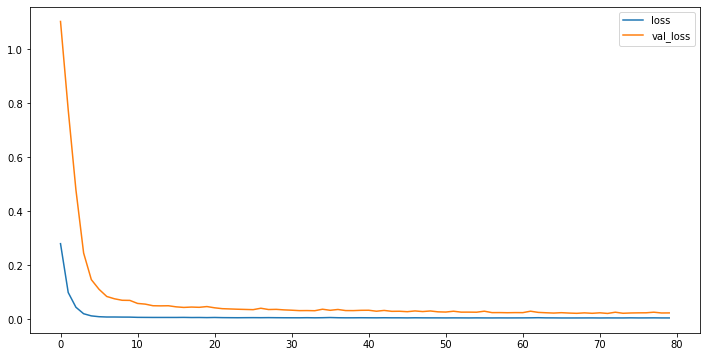

In [ ]:
plt.figure(figsize = [12,6])
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

40/40 [==============================] - 1s 3ms/step


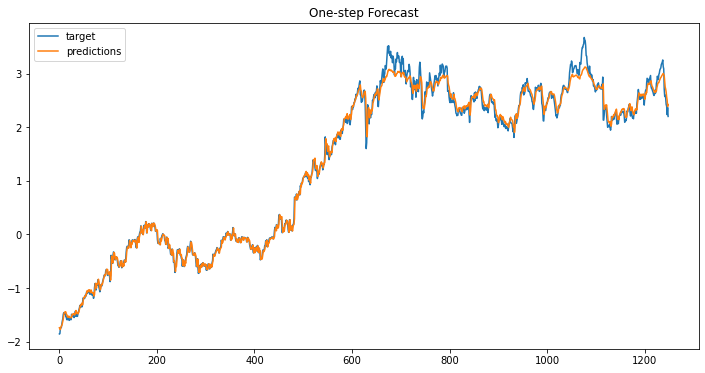

In [ ]:
# One-step forecast using true targets

output = model.predict(X)
predict = output[:,0]

plt.figure(figsize = (12,6))
plt.plot(Y,label = 'target')
plt.plot(predict,label = 'predictions')
plt.title('One-step Forecast')
plt.legend()
plt.show()

In [ ]:
# Multi-step forecast

validation_target = Y[-N//2:]
validation_predict = []
last_x = X[-N//2]

while len(validation_predict) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,D))[0][0]
  validation_predict.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 [==============================] - 0s 20ms/step


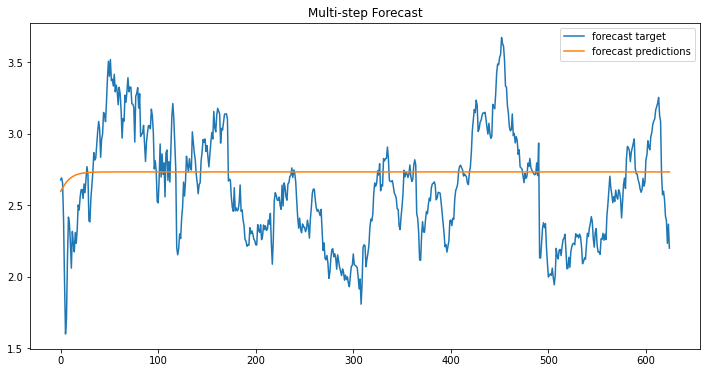

In [ ]:
# Multi-step forecast using predicted value

plt.figure(figsize = (12,6))
plt.plot(validation_target,label = 'forecast target')
plt.plot(validation_predict,label = 'forecast predictions')
plt.title('Multi-step Forecast')
plt.legend()
plt.show()

Model diatas menggunakan LSTM dengan hidden unit sebanyak 5 tidak terlalu memprediksi nilai setelahnya dengan menggunakan data training yang sudah ada. Hal ini dikarenakan data time series pada kasus ini sangat berkorelasi satu sama lain, yaitu data sebelumnya berkorelasi erat dengan data setelahnya.

Analoginya sama seperti piksel gambar yang dimana apabila suatu piksel berwarna merah, maka bisa jadi piksel disebelahnya juga berwarna merah.

Sehingga prediksi time series diatas, model hanya meng-copy nilai sebelumnya.

**Stock Returns**

Biasanya ketika melakukan stocks price prediction, kita tidak memprediksi stock price tersebut pada timestamp berikutnya, melainkan memprediksi stock return atau saham yang dihasilkan perhari untuk melakukan prediksi.

Stock returns :

R = (Vfinal - Vinitial)/Vinitial

In [ ]:
df['prevclose'] = df['close'].shift(1)

In [ ]:
df['return'] = (df['close'] - df['prevclose'])/df['prevclose']
df['prevclose'][0] = 0
df['return'][0] = 0

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,open,high,low,close,volume,Name,prevclose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,0.000,0.000000
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


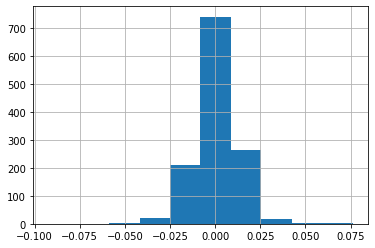

In [ ]:
df['return'].hist()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Lakukan standarisasi karena value data terlalu kecil

series = df['return'].values.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [ ]:
# Build data

T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)
N = len(X)


In [ ]:
X.shape, Y.shape

((1249, 10, 1), (1249,))

In [ ]:
# Build LSTM Model

i = Input(shape = X[0].shape)
x = LSTM(5)(i)
o = Dense(1)(x)

model = Model(i,o)

model.compile(loss = 'mse',optimizer = Adam(0.01))

r = model.fit(X[:-N//2],Y[:-N//2],
              epochs = 80,
              validation_data = (X[-N//2:],Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 3s 36ms/step - loss: 1.0213 - val_loss: 1.1833
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 1.0028 - val_loss: 1.1384
Epoch 3/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9947 - val_loss: 1.1528
Epoch 4/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9931 - val_loss: 1.1506
Epoch 5/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9959 - val_loss: 1.1490
Epoch 6/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9937 - val_loss: 1.1543
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9894 - val_loss: 1.1537
Epoch 8/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9895 - val_loss: 1.1532
Epoch 9/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9918 - val_loss: 1.1507
Epoch 10/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9898 - val_loss: 1.1610
Epoch 11/80

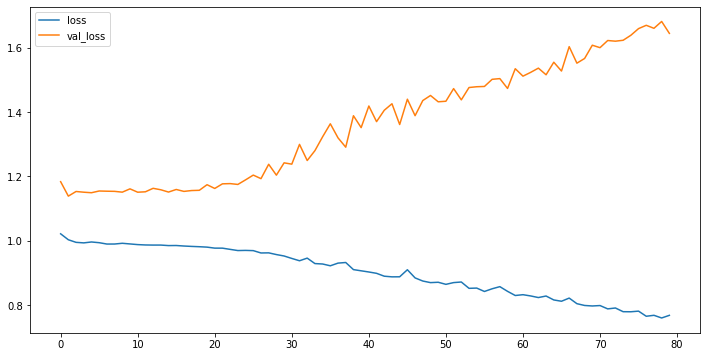

In [ ]:
plt.figure(figsize = [12,6])
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

40/40 [==============================] - 1s 2ms/step


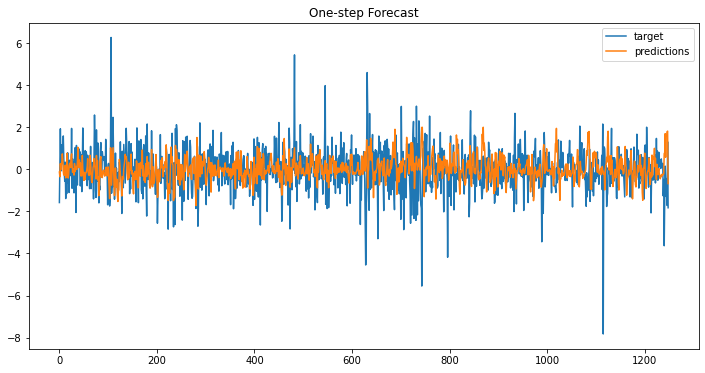

In [ ]:
# One-step forecast using true targets

output = model.predict(X)
predict = output[:,0]

plt.figure(figsize = (12,6))
plt.plot(Y,label = 'target')
plt.plot(predict,label = 'predictions')
plt.title('One-step Forecast')
plt.legend()
plt.show()

In [ ]:
# Multi-step forecast

validation_target = Y[-N//2:]
validation_predict = []
last_x = X[-N//2]

while len(validation_predict) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,D))[0][0]
  validation_predict.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 [==============================] - 0s 19ms/step


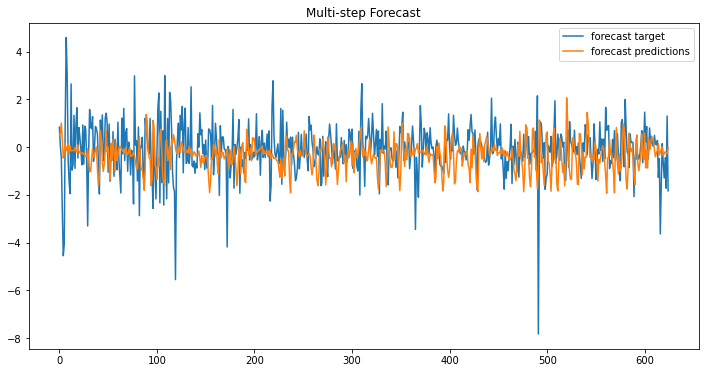

In [ ]:
# Multi-step forecast using predicted value

plt.figure(figsize = (12,6))
plt.plot(validation_target,label = 'forecast target')
plt.plot(validation_predict,label = 'forecast predictions')
plt.title('Multi-step Forecast')
plt.legend()
plt.show()

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,prevclose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,0.000,0.000000
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [ ]:
# Sekarang merupakan kasus klasifikasi yang dimana menentukan apakah stock return naik/turun ketika diprediksi

input_data = df[['open','high','low','close','volume']].values
target = df['return'].values

In [ ]:
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [ ]:
Ntrain = len(input_data)* 2//3

scaler = StandardScaler()
scaler.fit(input_data[:Ntrain+T])
input_data = scaler.transform(input_data)

In [ ]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain,T,D))
Y_train = np.zeros((Ntrain))

for t in range(Ntrain):
  X_train[t,:,:] = input_data[t:t+T]
  Y_train[t] = (target[t+T]>0)

In [ ]:

print(X_train.shape)

X_train[0]

(839, 10, 5)


array([[-1.58942908, -1.57081711, -1.57170368, -1.56438486, -0.4813086 ],
       [-1.55633563, -1.57708484, -1.57071748, -1.57558064, -0.88449196],
       [-1.58164238, -1.57563844, -1.56627961, -1.56973937, -0.11862304],
       [-1.55925564, -1.57997764, -1.58846899, -1.5906706 , -0.5109671 ],
       [-1.60451579, -1.6113163 , -1.59586545, -1.60430023, -0.06285912],
       [-1.60062245, -1.61661976, -1.65405094, -1.66319974,  2.15640661],
       [-1.66145598, -1.66917228, -1.6614474 , -1.65784524,  0.62029016],
       [-1.64977594, -1.65808322, -1.70286758, -1.71333734,  0.79016152],
       [-1.72423619, -1.7159392 , -1.73541201, -1.71139025,  1.1300847 ],
       [-1.69357609, -1.68845761, -1.69793661, -1.67147488,  0.55497747]])

In [ ]:
# Setup X_test and Y_test
X_test = np.zeros((N-Ntrain,T,D))
Y_test = np.zeros((N-Ntrain))

for t in range(N - Ntrain):
  u = t + Ntrain
  X_test[t,:,:] = input_data[u:u+T]
  Y_test[t] = (target[u+T]>0)

In [ ]:
print('X_train shape : ',X_train.shape, 'Y_train shape : ', Y_train.shape)
print('X_test shape : ',X_test.shape, 'Y_test shape : ', Y_test.shape)

X_train shape :  (839, 10, 5) Y_train shape :  (839,)
X_test shape :  (410, 10, 5) Y_test shape :  (410,)


In [ ]:
# Build LSTM Model

i = Input(shape = X_train[0].shape)
x = LSTM(50)(i)
o = Dense(1,activation = 'sigmoid')(x)

model = Model(i,o)

model.compile(loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              optimizer = Adam(0.001))

r = model.fit(X_train,Y_train,
              epochs = 300,
              validation_data = (X_test,Y_test))

Epoch 1/300
27/27 [==============================] - 3s 35ms/step - loss: 0.6974 - accuracy: 0.4887 - val_loss: 0.6964 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5256 - val_loss: 0.6931 - val_accuracy: 0.5073
Epoch 3/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6910 - accuracy: 0.5364 - val_loss: 0.6966 - val_accuracy: 0.4854
Epoch 4/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6913 - accuracy: 0.5352 - val_loss: 0.6950 - val_accuracy: 0.4927
Epoch 5/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6910 - accuracy: 0.5471 - val_loss: 0.7000 - val_accuracy: 0.4878
Epoch 6/300
27/27 [==============================] - 0s 11ms/step - loss: 0.6918 - accuracy: 0.5268 - val_loss: 0.6930 - val_accuracy: 0.4976
Epoch 7/300
27/27 [==============================] - 0s 12ms/step - loss: 0.6893 - accuracy: 0.5399 - val_loss: 0.6950 - val_accuracy: 0.4951
Epoch 

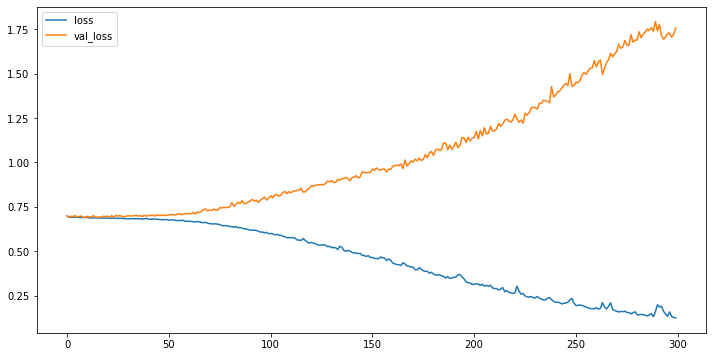

In [ ]:
plt.figure(figsize = [12,6])
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

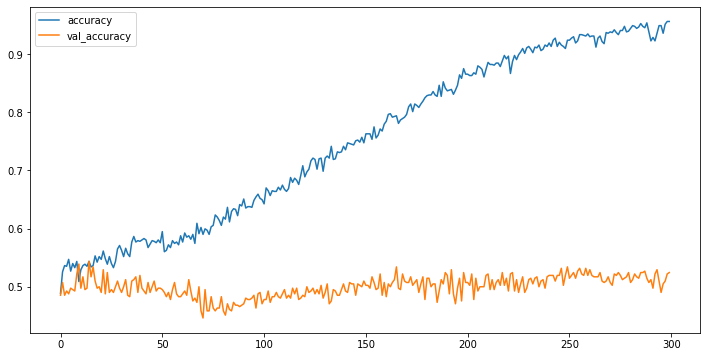

In [ ]:
 plt.figure(figsize = [12,6])
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()